# Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [3]:
#loading csv file into pandas dataframe
data = pd.read_csv('Iris.csv')

In [4]:
#printing first five rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#checking number of rows and columns in the dataset
data.shape

(150, 6)

In [6]:
unique_labels = data['Species'].unique()
column_names = data.columns[1:len(data.columns)-1]

In [7]:
#checking null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
#checking data types
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [28]:
#describing statistics of the columns of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Exploratory data analysis

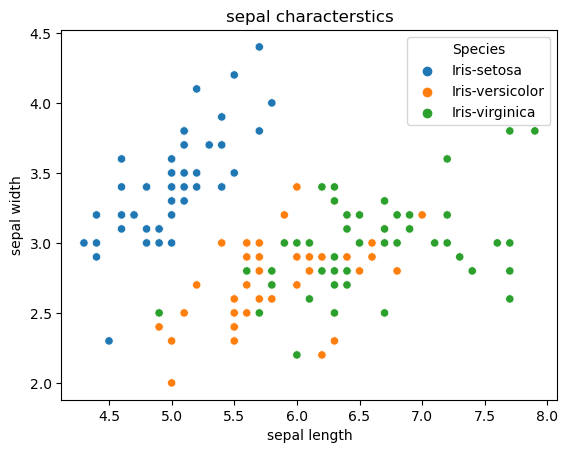

In [53]:
#sepal characterstics
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal characterstics')
plt.show()

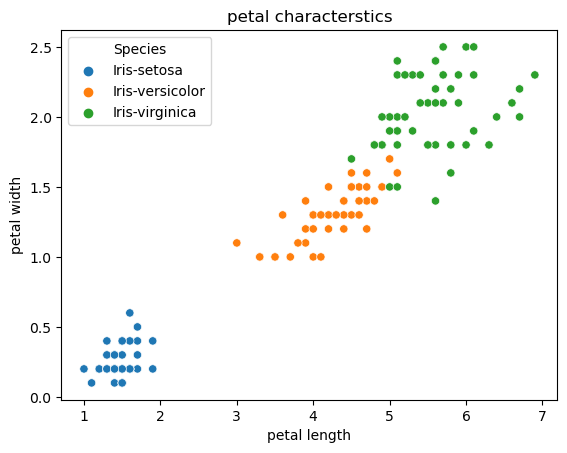

In [54]:
#petal characterstics
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('petal characterstics')
plt.show()

# Feature engineering

In [29]:
#loading ordinal encoder class for label encoding
from sklearn.preprocessing import OrdinalEncoder

In [35]:
#converting categorical values into numerical values in target column by ordinal encoder
oe = OrdinalEncoder(categories=[unique_labels.tolist()])

In [36]:
data['Species_labels'] = oe.fit_transform(data[['Species']])

In [37]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


# Splitting datasets

In [58]:
#splitting dataset into independent and dependent features
X = data[column_names]
Y = data['Species_labels']

In [59]:
#loading important libraries required for machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
#splitting dataset into train and test datasets
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression Model

In [61]:
#deploying logistic regression model
model = LogisticRegression(multi_class='ovr')

In [62]:
#training the model with train dataset
model.fit(train_X,train_Y)

LogisticRegression(multi_class='ovr')

In [43]:
#prediction of test input data with the model
pred_test_Y = model.predict(test_X)

In [44]:
#accuracy of the model
print(f'accuracy of the model is {accuracy_score(pred_test_Y,test_Y)*100} %')

accuracy of the model is 96.66666666666667 %


In [45]:
#confusion matrix
cm = confusion_matrix(pred_test_Y, test_Y)

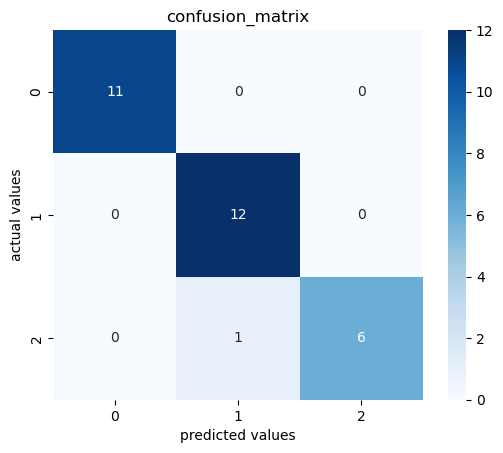

In [44]:
sns.heatmap(cm,annot=True,cmap='Blues',square=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('confusion_matrix')
plt.show()

In [47]:
#classification report
print(classification_report(pred_test_Y,test_Y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

